In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
input = pd.DataFrame(pd.read_excel("data/Input.xlsx"))
input

,URL_ID,URL
0,123.0,https://insights.blackcoffer.com/rise-of-telem...
1,321.0,https://insights.blackcoffer.com/rise-of-e-hea...
2,2345.0,https://insights.blackcoffer.com/rise-of-e-hea...
3,4321.0,https://insights.blackcoffer.com/rise-of-telem...
4,432.0,https://insights.blackcoffer.com/rise-of-telem...
...,...,...
109,50921.0,https://insights.blackcoffer.com/coronavirus-i...
110,51382.8,https://insights.blackcoffer.com/coronavirus-i...
111,51844.6,https://insights.blackcoffer.com/what-are-the-...
112,52306.4,https://insights.blackcoffer.com/marketing-dri...


In [3]:
from bs4 import BeautifulSoup as bsoup
import requests
import lxml

### Scraping one of the urls

In [4]:
index = 0
for url in input["URL"]:
    print(f"{index}, {url}")
    index += 1

0, https://insights.blackcoffer.com/rise-of-telemedicine-and-its-impact-on-livelihood-by-2040-3-2/
1, https://insights.blackcoffer.com/rise-of-e-health-and-its-impact-on-humans-by-the-year-2030/
2, https://insights.blackcoffer.com/rise-of-e-health-and-its-imapct-on-humans-by-the-year-2030-2/
3, https://insights.blackcoffer.com/rise-of-telemedicine-and-its-impact-on-livelihood-by-2040-2/
4, https://insights.blackcoffer.com/rise-of-telemedicine-and-its-impact-on-livelihood-by-2040-2-2/
5, https://insights.blackcoffer.com/rise-of-chatbots-and-its-impact-on-customer-support-by-the-year-2040/
6, https://insights.blackcoffer.com/rise-of-e-health-and-its-imapct-on-humans-by-the-year-2030/
7, https://insights.blackcoffer.com/how-does-marketing-influence-businesses-and-consumers/
8, https://insights.blackcoffer.com/how-advertisement-increase-your-market-value/
9, https://insights.blackcoffer.com/negative-effects-of-marketing-on-society/
10, https://insights.blackcoffer.com/how-advertisement-mar

In [5]:
url = input['URL'][0]
url

'https://insights.blackcoffer.com/rise-of-telemedicine-and-its-impact-on-livelihood-by-2040-3-2/'

'<!doctype html >\r\n<!--[if IE 8]>    <html class="ie8" lang="en"> <![endif]-->\r\n<!--[if IE 9]>    <html class="ie9" lang="en"> <![endif]-->\r\n<!--[if gt IE 8]><!--> <html lang="en-US"> <!--<![endif]-->\r\n<head>\r\n    <title>Rise of telemedicine and its Impact on Livelihood by 2040 | Blackcoffer Insights</title>\r\n    <meta charset="UTF-8" />\r\n    <meta name="viewport" content="width=device-width, initial-scale=1.0">\r\n    <link rel="pingback" href="https://insights.blackcoffer.com/xmlrpc.php" />\r\n    <meta name=\'robots\' content=\'max-image-preview:large\' />\n<link rel=\'dns-prefetch\' href=\'//fonts.googleapis.com\' />\n<link rel="alternate" type="application/rss+xml" title="Blackcoffer Insights &raquo; Feed" href="https://insights.blackcoffer.com/feed/" />\n<link rel="alternate" type="application/rss+xml" title="Blackcoffer Insights &raquo; Comments Feed" href="https://insights.blackcoffer.com/comments/feed/" />\n<script type="text/javascript">\nwindow._wpemojiSettings
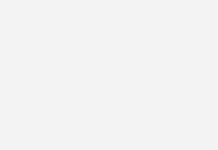
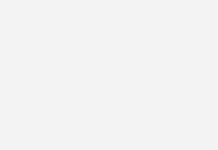
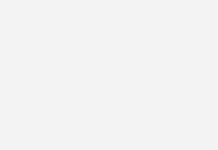
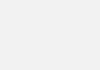
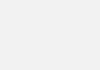
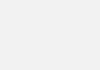
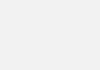
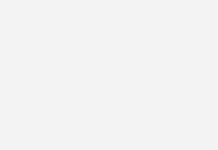
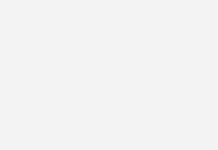
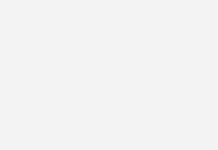
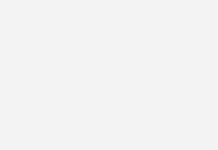

In [6]:
html_text = requests.get(url).text
html_text

In [7]:
## initializing beautifull soup instance
soup = bsoup(html_text,'lxml')

## find title
heading=soup.find('h1',class_='entry-title').text
heading

'Rise of telemedicine and its Impact on Livelihood by 2040'

In [8]:
type(heading)

str

In [9]:
head = soup.find('h5')
type(head)

NoneType

In [10]:
headings = soup.find_all("h1")
for heading in headings:
    print(heading['class'])

['entry-title']


In [11]:
## Find content
article_text=soup.find('div',class_='td-post-content')
content=article_text.find_all('p')
article_text = ""
for cont in content:
    article_text += cont.text
print(article_text)

Telemedicine, the use of technology to diagnose and treat patients remotely, has been rising in recent years. With the advent of high-speed internet and improved video conferencing tools, healthcare providers are increasingly turning to telemedicine to provide care to patients in remote or underserved areas.Telemedicine, using technology to provide healthcare services remotely, has recently gained popularity. With advancements in communication and medical technology, it has become increasingly possible for doctors and patients to connect and interact from anywhere in the world. This has led to the rise of telemedicine, which has the potential to revolutionize the way healthcare is delivered.#TelemedicineThe increasing focus on preventative healthcare has also driven the rise of telemedicine. As more and more people become aware of the importance of staying healthy, they are looking for ways to prevent illness and maintain their health. Telemedicine allows people to monitor their health

In [12]:
url = input["URL"][2]
html = requests.get(url).text
soup = bsoup(html,'lxml')
article_text=soup.find('div',class_='td-post-content')
content=article_text.find_all('p')
article_text = ""
for cont in content:
    article_text += cont.text
print(article_text)

2020 was the year the world was ravaged by the SarsCov2 virus. This notorious virus brought about a pandemic that would go on to change the course of humanity.  From that point forth daily lives of everyone across the world changed. With widespread stringent lockdowns, the entire world came to a sharp halt. Not only was the general populace affected, but the pandemic also affected all industries. The pandemic did not even spare critical industries, like healthcare and security. While these industries were required to function for the benefit of society, their daily operations changed drastically. But just as human nature prevails, we rose from this adversity. Post pandemic era saw the rise of new technologies that could aid overcome the restrictions put forth by the pandemic. In this article, we will specifically focus on the healthcare industries, innovations done in the industry, and the impact of those innovations on humans by 2030.Lockdowns initiated to curb the pandemic caused peo

### scraping all urls at once

In [13]:
## Maintain an output file
output_file = pd.DataFrame(columns=['URL_ID','URL'])

In [14]:
## Find all classes of the urls belonging to h1
article_title_class = []
for index,url in enumerate(input["URL"]):
    html_text = requests.get(url).text
    
    ## initializing beautifull soup instance
    soup = bsoup(html_text,'lxml')

    ## find title
    heading=soup.find('h1')
    if heading:
        heading_class = heading['class']
        if heading_class not in article_title_class:
            article_title_class.append(heading_class)
        print(f"{index}, {heading_class}, {article_title_class}")
        
        tempdf = pd.DataFrame({'URL_ID':[input['URL_ID'][index]], 'URL':[input['URL'][index]]})
        output_file = output_file.append(tempdf,ignore_index=True)

0, ['entry-title'], [['entry-title']]
1, ['entry-title'], [['entry-title']]
2, ['tdb-title-text'], [['entry-title'], ['tdb-title-text']]
3, ['entry-title'], [['entry-title'], ['tdb-title-text']]
4, ['entry-title'], [['entry-title'], ['tdb-title-text']]
5, ['entry-title'], [['entry-title'], ['tdb-title-text']]
6, ['entry-title'], [['entry-title'], ['tdb-title-text']]
7, ['entry-title'], [['entry-title'], ['tdb-title-text']]
8, ['tdb-title-text'], [['entry-title'], ['tdb-title-text']]
9, ['entry-title'], [['entry-title'], ['tdb-title-text']]
10, ['entry-title'], [['entry-title'], ['tdb-title-text']]
11, ['entry-title'], [['entry-title'], ['tdb-title-text']]
12, ['entry-title'], [['entry-title'], ['tdb-title-text']]
13, ['entry-title'], [['entry-title'], ['tdb-title-text']]
14, ['entry-title'], [['entry-title'], ['tdb-title-text']]
15, ['entry-title'], [['entry-title'], ['tdb-title-text']]
16, ['entry-title'], [['entry-title'], ['tdb-title-text']]
17, ['tdb-title-text'], [['entry-title'],

In [15]:
input.shape

(114, 2)

In [16]:
output_file.shape

(112, 2)

In [17]:
article_title_class

[['entry-title'], ['tdb-title-text']]

In [18]:
article_title = []
article_content = []

for index,url in enumerate(input["URL"]):
    html_text = requests.get(url).text
    
    ## initializing beautifull soup instance
    soup = bsoup(html_text,'lxml')

    ## find title
    heading=soup.find('h1',class_=article_title_class)
    if heading:
        ## for title
        article_title.append(heading.text)
        print(f"{index}, {heading.text}")
        
        ## for content
        article_body=soup.find('div',class_='td-post-content')
        content=article_body.find_all('p')
        article_text = ""
        for cont in content:
            article_text += cont.text
        print(f"{index} done")
        article_content.append(article_text)
        
    else:
        print(f"{index}, no page availabe for this url")
        
# article_title

0, Rise of telemedicine and its Impact on Livelihood by 2040
0 done
1, Rise of e-health and its impact on humans by the year 2030
1 done
2, Rise of e-health and its impact on humans by the year 2030
2 done
3, Rise of telemedicine and its Impact on Livelihood by 2040
3 done
4, Rise of telemedicine and its Impact on Livelihood by 2040
4 done
5, Rise of Chatbots and its impact on customer support by the year 2040
5 done
6, Rise of e-health and its impact on humans by the year 2030
6 done
7, How does marketing influence businesses and consumers?
7 done
8, How advertisement increase your market value?
8 done
9, Negative effects of marketing on society
9 done
10, How advertisement/marketing affects business.
10 done
11, Rising IT cities will impact the economy, environment, infrastructure, and city life by the year 2035
11 done
12, Rise of OTT platform and its impact on entertainment industry by the year 2030
12 done
13, Rise of Electric Vehicles and its Impact on Livelihood by 2040
13 done


In [19]:
# article_content = []

# for index,url in enumerate(input["URL"]):
#     html_text = requests.get(url).text
    
#     ## initializing beautifull soup instance
#     soup = bsoup(html_text,'lxml')

#     ## find title
#     heading=soup.find('h1',class_=article_title_class)
#     if heading:
#         article_body=soup.find('div',class_='td-post-content')
#         content=article_body.find_all('p')
#         article_text = ""
#         for cont in content:
#             article_text += cont.text
#         print(f"{index} done")
#         article_content.append(article_text)

In [20]:
URL_ID = pd.DataFrame()

URL_ID['article_title'] = article_title
URL_ID['article_content'] = article_content

In [21]:
URL_ID.head()

,article_title,article_content
0,Rise of telemedicine and its Impact on Livelih...,"Telemedicine, the use of technology to diagnos..."
1,Rise of e-health and its impact on humans by t...,"The rise of e-health, or the use of electronic..."
2,Rise of e-health and its impact on humans by t...,2020 was the year the world was ravaged by the...
3,Rise of telemedicine and its Impact on Livelih...,"“More gains on quality, affordability and acce..."
4,Rise of telemedicine and its Impact on Livelih...,"“More gains on quality, affordability and acce..."


In [22]:
URL_ID.to_csv('opData/URL_ID.csv',index=True)

### Data Analysis

### Import stopwords

In [23]:
## read stopwords
with open('data/StopWords/StopWords_Generic.txt','r') as file:
    words = file.read().split()

stop_words = [word.lower() for word in words]

In [24]:
stop_words

['about',
 'above',
 'after',
 'again',
 'all',
 'am',
 'among',
 'an',
 'and',
 'any',
 'are',
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'did',
 'do',
 'does',
 'doing',
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'has',
 'have',
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'if',
 'in',
 'into',
 'is',
 'it',
 'its',
 'itself',
 'just',
 'me',
 'more',
 'most',
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'now',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'same',
 'she',
 'should',
 'so',
 'some',
 'such',
 'than',
 'that',
 'the',
 'their',
 'theirs',
 'them',
 'themselves',
 'then',
 'there',
 'these',
 'they',
 'this',
 'those',
 'through',
 'to',
 'too',
 'under',
 'until',
 'up',
 'very',
 'was',
 'we',
 'were',
 'what',
 'when',
 'where',
 'which',
 'while',
 '

In [25]:
df= URL_ID.applymap(lambda x:x.lower())
df.head()

,article_title,article_content
0,rise of telemedicine and its impact on livelih...,"telemedicine, the use of technology to diagnos..."
1,rise of e-health and its impact on humans by t...,"the rise of e-health, or the use of electronic..."
2,rise of e-health and its impact on humans by t...,2020 was the year the world was ravaged by the...
3,rise of telemedicine and its impact on livelih...,"“more gains on quality, affordability and acce..."
4,rise of telemedicine and its impact on livelih...,"“more gains on quality, affordability and acce..."


In [26]:
URL_ID.shape

(112, 2)

In [27]:
import nltk
from nltk.tokenize import word_tokenize

In [28]:
import re
def remove_stopwords(x):
#     review = re.sub('[^a-z0-9]',' ',x)
    review = x.split()
    filtered_words = [word for word in review if word not in stop_words]
    return ' '.join(filtered_words)

In [29]:
df1 = pd.DataFrame(columns=['col'])
df1['col'] = df['article_content'].apply(remove_stopwords)

In [30]:
df['article_content'][0]

'telemedicine, the use of technology to diagnose and treat patients remotely, has been rising in recent years. with the advent of high-speed internet and improved video conferencing tools, healthcare providers are increasingly turning to telemedicine to provide care to patients in remote or underserved areas.telemedicine, using technology to provide healthcare services remotely, has recently gained popularity. with advancements in communication and medical technology, it has become increasingly possible for doctors and patients to connect and interact from anywhere in the world. this has led to the rise of telemedicine, which has the potential to revolutionize the way healthcare is delivered.#telemedicinethe increasing focus on preventative healthcare has also driven the rise of telemedicine. as more and more people become aware of the importance of staying healthy, they are looking for ways to prevent illness and maintain their health. telemedicine allows people to monitor their healt

In [31]:
df1['col'][0]

'telemedicine, use technology diagnose treat patients remotely, rising recent years. advent high-speed internet improved video conferencing tools, healthcare providers increasingly turning telemedicine provide care patients remote underserved areas.telemedicine, using technology provide healthcare services remotely, recently gained popularity. advancements communication medical technology, become increasingly possible doctors patients connect interact anywhere world. led rise telemedicine, potential revolutionize way healthcare delivered.#telemedicinethe increasing focus preventative healthcare also driven rise telemedicine. people become aware importance staying healthy, looking ways prevent illness maintain health. telemedicine allows people monitor health get advice healthcare providers without traveling a clinic hospital.improved access healthcare: one biggest challenges healthcare industry unequal distribution medical resources, many remote rural areas lacking access quality care.

### Import Positive and Negative Words

In [32]:
## read positive and negative words

with open('data/MasterDictionary/positive-words.txt','r') as file:
    words = file.read().split()

positive_words = [word.lower() for word in words]

In [33]:
with open('data/MasterDictionary/negative-words.txt','r',encoding = "ISO-8859-1") as file:
    words = file.read().split()

negative_words = [word.lower() for word in words]

In [34]:
positive_words

['a+',
 'abound',
 'abounds',
 'abundance',
 'abundant',
 'accessable',
 'accessible',
 'acclaim',
 'acclaimed',
 'acclamation',
 'accolade',
 'accolades',
 'accommodative',
 'accomodative',
 'accomplish',
 'accomplished',
 'accomplishment',
 'accomplishments',
 'accurate',
 'accurately',
 'achievable',
 'achievement',
 'achievements',
 'achievible',
 'acumen',
 'adaptable',
 'adaptive',
 'adequate',
 'adjustable',
 'admirable',
 'admirably',
 'admiration',
 'admire',
 'admirer',
 'admiring',
 'admiringly',
 'adorable',
 'adore',
 'adored',
 'adorer',
 'adoring',
 'adoringly',
 'adroit',
 'adroitly',
 'adulate',
 'adulation',
 'adulatory',
 'advanced',
 'advantage',
 'advantageous',
 'advantageously',
 'advantages',
 'adventuresome',
 'adventurous',
 'advocate',
 'advocated',
 'advocates',
 'affability',
 'affable',
 'affably',
 'affectation',
 'affection',
 'affectionate',
 'affinity',
 'affirm',
 'affirmation',
 'affirmative',
 'affluence',
 'affluent',
 'afford',
 'affordable',
 'af

In [35]:
negative_words

['2-faced',
 '2-faces',
 'abnormal',
 'abolish',
 'abominable',
 'abominably',
 'abominate',
 'abomination',
 'abort',
 'aborted',
 'aborts',
 'abrade',
 'abrasive',
 'abrupt',
 'abruptly',
 'abscond',
 'absence',
 'absent-minded',
 'absentee',
 'absurd',
 'absurdity',
 'absurdly',
 'absurdness',
 'abuse',
 'abused',
 'abuses',
 'abusive',
 'abysmal',
 'abysmally',
 'abyss',
 'accidental',
 'accost',
 'accursed',
 'accusation',
 'accusations',
 'accuse',
 'accuses',
 'accusing',
 'accusingly',
 'acerbate',
 'acerbic',
 'acerbically',
 'ache',
 'ached',
 'aches',
 'achey',
 'aching',
 'acrid',
 'acridly',
 'acridness',
 'acrimonious',
 'acrimoniously',
 'acrimony',
 'adamant',
 'adamantly',
 'addict',
 'addicted',
 'addicting',
 'addicts',
 'admonish',
 'admonisher',
 'admonishingly',
 'admonishment',
 'admonition',
 'adulterate',
 'adulterated',
 'adulteration',
 'adulterier',
 'adversarial',
 'adversary',
 'adverse',
 'adversity',
 'afflict',
 'affliction',
 'afflictive',
 'affront',


### Calculate variables

In [37]:
## create lists for python
positive_scores=[]
negative_scores=[]
polarity_scores=[]
subjectivity_scores=[]
avg_sent_lengths=[]
complex_words_percentages=[]
fog_indexes=[]
avg_words_per_sentence_list=[]
complex_word_count_list=[]
word_count_list=[]
syllable_per_word_list=[]
pronouns_count_list=[]
avg_word_length_list=[]

In [38]:
def syllable_count(word):
    count = 0
    vowels = "aeiouy"
    if word[0] in vowels:
        count += 1
    for index in range(1, len(word)):
        if word[index] in vowels and word[index - 1] not in vowels:
            count += 1
            if word.endswith("e"):
                count -= 1
    if count == 0:
        count += 1
    return count

In [39]:
def calculate_score(x):
    
    positive_score=0
    negative_score=0
    polarity_score=0
    subjectivity_score=0
    avg_sent_length=0
    complex_word_percentage=0
    fog_index=0
    avg_words_per_sentence=0
    word_count=0
    number_of_syllables=0
    avg_word_length=0
    

    review = x.split()
    positive_score = sum(1 for word in review if word in positive_words)
    negative_score = sum(1 for word in review if word in negative_words)
    
    polarity_score = (positive_score-negative_score)/((positive_score+negative_score)+0.000001)
    polarity_score = round(polarity_score,3)
    
    subjectivity_score = (positive_score+negative_score)/((len(review))+0.000001)
    subjectivity_score = round(subjectivity_score,3)
    
    avg_sent_length = len(review)/len(x.split('.'))
    avg_sent_length = round(avg_sent_length,3)
    
    ## Calculate complex words
    complex_word_count = sum(1 for word in review if syllable_count(word)>2)
    complex_word_percentage= complex_word_count/len(review)
    complex_word_percentage = round(complex_word_percentage,3)
    
    ## Fog index
    fog_index = 0.4 * (avg_sent_length+complex_word_percentage)
    fog_index = round(fog_index,3)
    
    ## avg words per sentence
    avg_words_per_sentence = avg_sent_length
    
    
    ##Number of complex words = complex_word_count
    
    ## clean word count
    clean_words = re.sub('[^a-z0-9]',' ',x)
    clean_words = clean_words.split()
    word_count = len(clean_words)
    
    ## Syllables per word
    number_of_syllables = sum(syllable_count(word) for word in review)
    syllables_per_word = number_of_syllables/len(review)
    syllables_per_word = round(syllables_per_word,3)
    
    ## Personal pronouns are calculated later beacause we need original data for it instead of cleaned one
    
    ## avg word length
    clean_words = re.sub('[^a-z0-9]','',x)
    char_count = len(clean_words)
    avg_word_length = char_count/len(review)
    avg_word_length = round(avg_word_length,3)
    
    
    positive_scores.append(positive_score)
    negative_scores.append(negative_score)
    polarity_scores.append(polarity_score)
    subjectivity_scores.append(subjectivity_score)
    avg_sent_lengths.append(avg_sent_length)
    complex_words_percentages.append(complex_word_percentage)
    fog_indexes.append(fog_index)
    avg_words_per_sentence_list.append(avg_words_per_sentence)
    complex_word_count_list.append(complex_word_count)
    word_count_list.append(word_count)
    syllable_per_word_list.append(syllables_per_word)
    avg_word_length_list.append(avg_word_length)

In [40]:
df1['col'].apply(calculate_score)

0      None
1      None
2      None
3      None
4      None
       ... 
107    None
108    None
109    None
110    None
111    None
Name: col, Length: 112, dtype: object

In [41]:
## personal pronouns
pronoun_list = ['i','we','my','ours','us']

def pronoun_count(x):
    
    pronoun_count=0
    
    review = x.split()
    pronoun_count = sum(1 for word in review if word.isupper()==False and word.lower() in pronoun_list)
    
    pronouns_count_list.append(pronoun_count)

In [42]:
df['article_content'].apply(pronoun_count)

0      None
1      None
2      None
3      None
4      None
       ... 
107    None
108    None
109    None
110    None
111    None
Name: article_content, Length: 112, dtype: object

### creating an output file

In [43]:
output_file.head()

,URL_ID,URL
0,123.0,https://insights.blackcoffer.com/rise-of-telem...
1,321.0,https://insights.blackcoffer.com/rise-of-e-hea...
2,2345.0,https://insights.blackcoffer.com/rise-of-e-hea...
3,4321.0,https://insights.blackcoffer.com/rise-of-telem...
4,432.0,https://insights.blackcoffer.com/rise-of-telem...


In [44]:
variable_columns=['POSITIVE SCORE','NEGATIVE SCORE','POLARITY SCORE','SUBJECTIVITY SCORE','AVG SENTENCE LENGTH','PERCENTAGE OF COMPLEX WORDS','FOG INDEX','AVG NUMBER OF WORDS PER SENTENCE','COMPLEX WORD COUNT','WORD COUNT','SYLLABLES PER WORD','PERSONAL PRONOUNS','AVG WORD LENGTH']
variable_lists=[positive_scores,negative_scores,polarity_scores,subjectivity_scores,avg_sent_lengths,complex_words_percentages,fog_indexes,avg_words_per_sentence_list,complex_word_count_list,word_count_list,syllable_per_word_list,pronouns_count_list,avg_word_length_list]
# variable = pd.DataFrame(list(zip(positive_scores,negative_scores,polarity_scores,subjectivity_scores,avg_sent_lengths,complex_words_percentages,fog_indexes,avg_words_per_sentence_list,complex_word_count_list,word_count_list,syllable_per_word_list,pronouns_count_list,avg_word_length_list)),
#                        columns=variable_columns)

In [45]:
final_output_df = output_file
for i in range(len(variable_columns)):
    final_output_df[variable_columns[i]] = variable_lists[i]

In [46]:
final_output_df.head()

,URL_ID,URL,POSITIVE SCORE,NEGATIVE SCORE,POLARITY SCORE,SUBJECTIVITY SCORE,AVG SENTENCE LENGTH,PERCENTAGE OF COMPLEX WORDS,FOG INDEX,AVG NUMBER OF WORDS PER SENTENCE,COMPLEX WORD COUNT,WORD COUNT,SYLLABLES PER WORD,PERSONAL PRONOUNS,AVG WORD LENGTH
0,123.0,https://insights.blackcoffer.com/rise-of-telem...,72,19,0.582,0.091,11.706,0.312,4.807,11.706,310,1035,2.108,2,7.447
1,321.0,https://insights.blackcoffer.com/rise-of-e-hea...,40,11,0.569,0.151,13.480,0.407,5.555,13.480,137,355,2.258,3,7.513
2,2345.0,https://insights.blackcoffer.com/rise-of-e-hea...,23,20,0.070,0.066,8.784,0.340,3.650,8.784,221,686,2.137,3,6.782
3,4321.0,https://insights.blackcoffer.com/rise-of-telem...,39,24,0.238,0.081,13.119,0.371,5.396,13.119,287,822,2.204,7,7.018
4,432.0,https://insights.blackcoffer.com/rise-of-telem...,39,24,0.238,0.081,13.119,0.371,5.396,13.119,287,822,2.204,7,7.018


In [47]:
final_output_df.to_csv('opData/final_df.csv',index=True)